In [1]:
from matplotlib import pyplot as plt
import cv2

In [2]:

face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') # cascade for the face.
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml') # cascade for the eyes.

def detect(gray, image): #  
    faces = face_cascade.detectMultiScale(gray, 1.3, 10) 
    for (x, y, w, h) in faces:
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 3)
        roi_gray = gray[y:y+h, x:x+w] 
        roi_color = image[y:y+h, x:x+w] 
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.6, 5) 
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color,(ex, ey),(ex+ew, ey+eh), (0, 255, 0), 3)
    return image


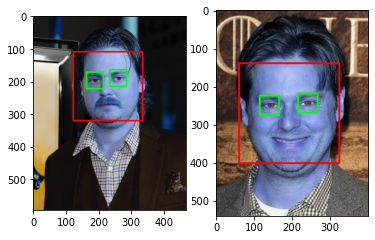

In [3]:
image = cv2.imread('tim.jpg',-1) #-1 for color, 0 for graysale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 
canvas = detect(gray,image)

image = cv2.imread('tim_smiling.jpg',-1)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
canvas2 = detect(gray,image)

plt.subplot(1,2,1)
plt.imshow(canvas)
plt.subplot(1,2,2)
plt.imshow(canvas2)

plt.show()